In [1]:
# To support both python 2 and python 3
###PAT 这段代码貌似是通用的，兼容Python2 和 3， 导入common包，然后写好了保存图片的方法
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "titanic_explore"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
data_train = pd.read_csv("train.csv")
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
data_train.describe() ###此方法自动过滤掉了非数字型的属性

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Sandstrom, Miss. Marguerite Rut",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Saving figure 乘客属性分布


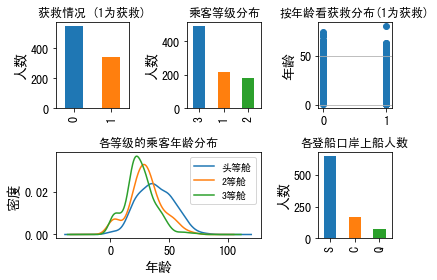

In [20]:
fig = plt.figure()
fig.set(alpha = 0.2)

plt.subplot2grid((2,3), (0,0))
data_train.Survived.value_counts().plot(kind = 'bar')
plt.title("获救情况 (1为获救)")
plt.ylabel("人数")

plt.subplot2grid((2,3), (0,1))
data_train.Pclass.value_counts().plot(kind = 'bar')
plt.ylabel("人数")
plt.title("乘客等级分布")

plt.subplot2grid((2,3), (0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel("年龄")
plt.grid(b = True, which='major', axis='y')
plt.title("按年龄看获救分布(1为获救)")

plt.subplot2grid((2,3), (1,0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde')
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel("年龄")
plt.ylabel("密度")
plt.title("各等级的乘客年龄分布")
plt.legend(("头等舱", "2等舱", "3等舱"), loc='best')

plt.subplot2grid((2,3), (1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title("各登船口岸上船人数")
plt.ylabel("人数")
save_fig("乘客属性分布")
plt.show()

   未获救   获救
1   80  136
2   97   87
3  372  119
Saving figure 各等级乘客获救情况


<Figure size 432x288 with 0 Axes>

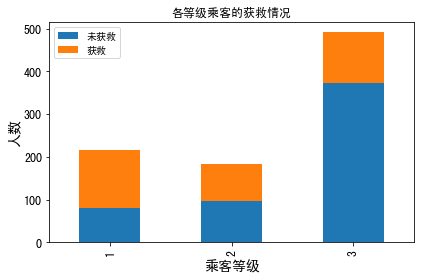

In [38]:
fig = plt.figure()
fig.set(alpha=0.2)

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts() ###过滤并统计各条目数量
df = pd.DataFrame({'获救':Survived_1, '未获救':Survived_0})
print(df)
df.plot(kind='bar', stacked=True)
plt.title("各等级乘客的获救情况")
plt.xlabel("乘客等级")
plt.ylabel("人数")
save_fig("各等级乘客获救情况")
plt.show()

<class 'pandas.core.series.Series'>
    女性   男性
0   81  468
1  233  109
Saving figure 性别与获救情况


<Figure size 432x288 with 0 Axes>

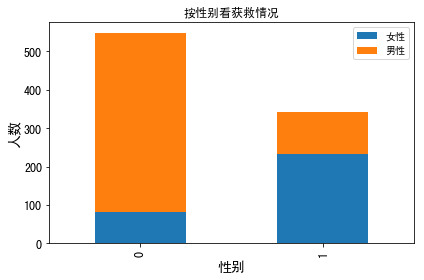

In [37]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数
#统计获救的男性和女性的数量，未获救的男性和女性的数量，然后作图，对比获救的男性和女性的数量
Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
# print(type(Survived_m))
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df=pd.DataFrame({'男性':Survived_m, '女性':Survived_f})
# print(df)
df.plot(kind='bar', stacked=True)###DataFrame直接支持画图
plt.title("按性别看获救情况")
plt.xlabel("性别") 
plt.ylabel("人数")
save_fig("性别与获救情况")
plt.show()

Saving figure 各等级舱各性别获救情况


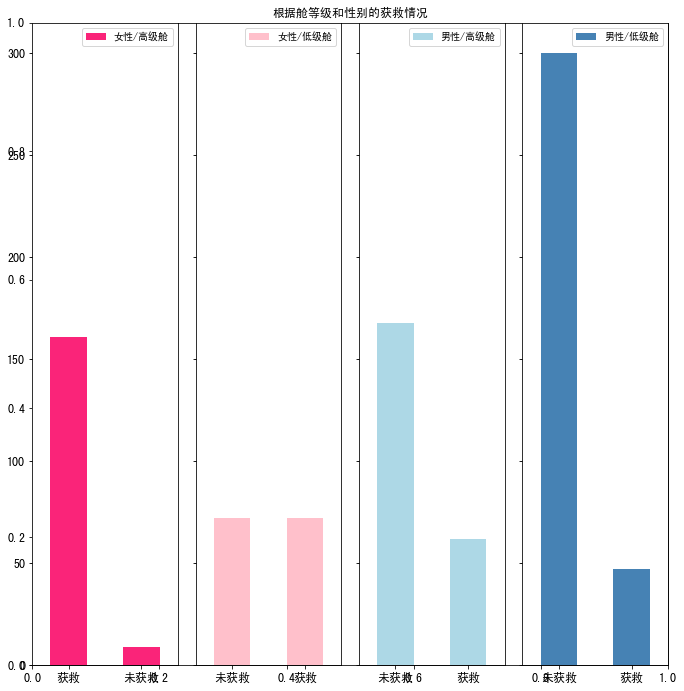

In [45]:
 #然后我们再来看看各种舱级别情况下各性别的获救情况
fig=plt.figure(figsize=(10,10))
fig.set(alpha=0.65) # 设置图像透明度，无所谓
plt.title(u"根据舱等级和性别的获救情况")

ax1=fig.add_subplot(141)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels([u"获救", u"未获救"], rotation=0)
ax1.legend([u"女性/高级舱"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"女性/低级舱"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/高级舱"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/低级舱"], loc='best')
save_fig("各等级舱各性别获救情况")
plt.show()

Saving figure 各港口登陆乘客获救情况


<Figure size 432x288 with 0 Axes>

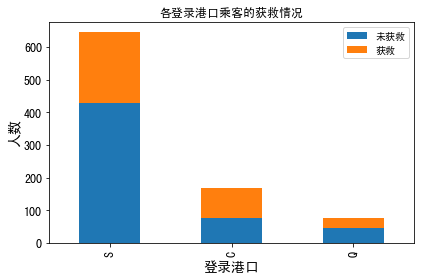

In [50]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各登录港口乘客的获救情况")
plt.xlabel(u"登录港口") 
plt.ylabel(u"人数") 
save_fig("各港口登陆乘客获救情况")
plt.show()

In [54]:
g = data_train.groupby(['SibSp', 'Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print(df)

g = data_train.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print(df)

                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7
                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7


In [55]:
data_train.Cabin.value_counts()

G6                 4
B96 B98            4
C23 C25 C27        4
C22 C26            3
F2                 3
E101               3
D                  3
F33                3
D33                2
E67                2
E25                2
E33                2
C92                2
D20                2
B18                2
C65                2
E24                2
F G73              2
B20                2
C2                 2
B5                 2
B49                2
B77                2
B57 B59 B63 B66    2
E8                 2
B35                2
E44                2
C125               2
C68                2
C78                2
                  ..
B30                1
A16                1
B71                1
D19                1
F E69              1
E12                1
D7                 1
A6                 1
B94                1
C106               1
C45                1
B19                1
C49                1
T                  1
C110               1
B82 B84            1
E77          

Saving figure Cabin有无和获救情况


<Figure size 432x288 with 0 Axes>

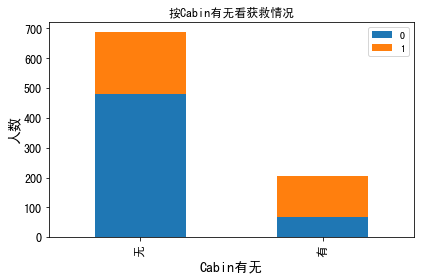

In [56]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df=pd.DataFrame({u'有':Survived_cabin, u'无':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title("按Cabin有无看获救情况")
plt.xlabel("Cabin有无") 
plt.ylabel("人数")
save_fig("Cabin有无和获救情况")
plt.show()


In [ ]:
##TODO group by